# Random Walk (Classical & Quantum)

## Classical random walk

A random walk is a process of moving according to a random variable. For the sake of simplicity, considering the one-dimensional case, a atom starting at point 0, moving to the left or right with a probability of 50%, each time the moving distance is 1, and continuing this process. In convention, moving 1 to the left is marked as -1, and moving 1 to the right is marked as +1. We can use a random variable $X_n = \{-1, 1\}$ to describe the $nth$ displacement of the atom. Thus, after $n$ moves, the position of the atom on the axis is
$$
x = \sum_{i=1}^n X_i
$$

Notice that $x$ satisfies the binomial distribution, so for probability for $k$ right moves in $n$ moves is
$$
f(k;n) = C(n,k)(\frac 12)^k(\frac12)^{n-k} =\frac1{2^n} C(n,k)
$$
and in this case the position after $n$ moves is $x = k - (n-k)$, so $k = \frac{x+n}2$. For a given $x$, after $n$ movies, the probability that the atom end up at point $x$ is
$$
p(x;n) = \frac1{2^n} C(n,\frac{x+n}2)
$$
if $ (x+n) \mod 2 = 0$, otherwise $p(x;n) = 0$.

In [1]:
## import module
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
import qutip as qt
from qutip.measurement import measurement_statistics_povm

In [2]:
## define dunction of combinatorial number
def ncr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

In [3]:
## main program to get probability for each x and n
x_range = np.arange(-100,101)
p = []
p_xn = []
for n in range(0,100):
    for i in range(len(x_range)):
        if ((x_range[i]+n) % 2 == 0 and n >= abs((x_range[i]+n)/2) and n >= abs((-x_range[i]+n)/2) ):
            p.append(ncr(n,abs((x_range[i]+n)/2))/2**n)
        else:
            p.append(0)
    p_xn.append(p)
    p = []

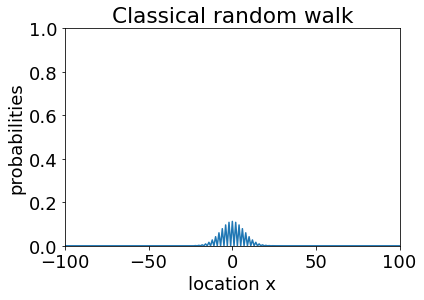

In [20]:
## Plot

fig, ax = plt.subplots() 
ax.plot(x_range,p_xn[50])
ax.set_xlabel('location x')  # Add an x-label to the axes.
ax.set_ylabel('probabilities')  # Add a y-label to the axes.
ax.set(xlim=(-100, 100), ylim=(0, 1))
plt.title("Classical random walk")
matplotlib.rcParams.update({'font.size': 18})
plt.show()

Now we focus on the statistical properties of the classical random walk. First, we consider the expectation of $x$ after $n$ moves, because we start from 0, so
$$
E(x) = E(\sum_{i = 1}^n X_i) = E(X_1) + E(X_2) + \cdots + E(X_n) = 0 + 0 + \cdots + 0 = 0
$$
means the average displacement after $n$ moves is 0, which is reasonable because move left and move right is symmetrical.

Consider the expectation of $x^2$ after $n$ moves, which illstrate the average distance the atom moves (this can tell us how far the atom can move after $n$ steps, or how fast it can move), we have
$$
E(x^2) = E(\sum_{i = 1}^n X_i\sum_{j = 1}^n X_j) = \sum_{i=1}^{n}X_i^2 + \sum_{i \neq j}X_iX_j = \sum_{i=1}^{n}1 + 0  = n
$$
$\sum_{i \neq j}X_iX_j = 0$ because $X_i$ and $X_j$ have no correlations. This equation give us a important conclusion: **For the classical random walk, the variance after $n$ steps is proportional to the $\sqrt{n}$, namely $\sqrt{E(x^2)}_n \propto \sqrt{n}$.**

## Quantum random walk

Now we consider the quantum case.

Instead of just considering the position of the atom, we add a spin freedom here. Now, the states of a atom can be written as
$$
|s\rangle\otimes |x\rangle
$$
where $s$ for spin. 

<!-- Notice that the random walk is a Markov process, we can use a state transition matrix to describe it 
$$
S = \left[\begin{array}{cc}
1-p_1 & p_2 \\
p_1 & 1-p_2 \\
\end{array}\right].
$$
with $p_1+p_2 = 1$. For example, if a state initialized in $|0\rangle = (1,0)^T$, after one transition, the state becomes $S|0\rangle = (1-p_1,p_1)^T$, which means it with probability $1-p_1$ in state $|0\rangle$, and with probability $p_1$ in state $|1\rangle$. When $p_1 = p_2 = 0.5$, the state transition matrix is just the Hadamard gate
$$
H = \frac12\left[\begin{array}{cc}
 &  \\
p_1 & 1-p_2 \\
\end{array}\right].
$$ -->

Similarly to the classical case, here we consider a quantum random walk contains two steps, step 1, apply a hardmard gate to the spin, and apply different position shift operation based on the spin states, and the position shift operation is
$$
S = |0\rangle\langle 0|\otimes\sum_x|x-1\rangle\langle x|+|1\rangle\langle 1|\otimes\sum_x|x+1\rangle\langle x|
$$
which meas that if the spin state is $|0\rangle$, the atom will move left by one, while if the spin state is $|1\rangle$ the atom will move right by one. One thing to note is that the initial state cannot be $|+\rangle$, because in this case, after Hadamard gate, the state will be $|0\rangle$, and it will give us no randomness. So we need to carefully chose our initial gate as
$$
|\psi_0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)\otimes|x_0\rangle.
$$
You can check that with this state, we always have the randomness.

Now we analyse the statistic properties of the quantum random walk. Such a process can be simulated by using qutip.

In [6]:
nmax = 200
phi = qt.basis(nmax,100)
a = np.diag(np.ones(nmax-1),1)
a = qt.Qobj(a)

In [7]:
psi0 = qt.basis(2,0)
psi1 = qt.basis(2,1)
up = (psi0+1j*psi1)/math.sqrt(2)
Cop = qt.tensor(qt.snot(),qt.identity(nmax))
Sop = qt.tensor(psi0*psi0.dag(), a) + qt.tensor(psi1*psi1.dag(), a.dag())

/Users/zundoko/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  after removing the cwd from sys.path.


In [8]:
state0 = qt.tensor(up,phi)

In [9]:
proj = [qt.basis(nmax,i)*qt.basis(nmax,i).dag() for i in range(nmax)]
prob = []
for i in range(100):
    state0 = Sop*Cop*state0
    state1 = state0.unit()
    state1 = state1.ptrace(1)
    eigenstates,probabilities= measurement_statistics_povm(state1,proj,targets=None)
    prob.append(probabilities)

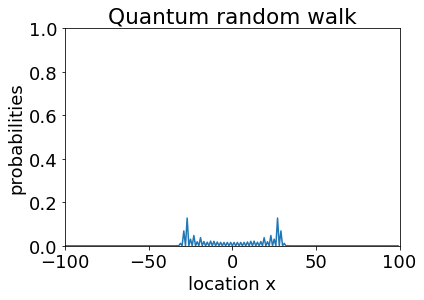

In [25]:
## Plot

x_ran = np.arange(-100,100)
fig, ax = plt.subplots() 
ax.plot(x_ran,prob[40])
ax.set_xlabel('location x')  # Add an x-label to the axes.
ax.set_ylabel('probabilities')  # Add a y-label to the axes.
ax.set(xlim=(-100, 100), ylim=(0, 1))

plt.title("Quantum random walk")

matplotlib.rcParams.update({'font.size': 18})
plt.show()

Now we compute the variance after $n$ walks.

In [11]:
## variance of quantum simulation
vari_q = []
variance = 0
for i in range(len(prob)):
    for j in range(len(prob[i])):
        variance = variance + x_ran[j]**2*prob[i][j]
    vari_q.append(np.sqrt(variance))
    variance = 0

In [12]:
## variance of classical simulation
vari_c = []
variance = 0
for i in range(len(p_xn)):
    for j in range(len(p_xn[i])):
        variance = variance + x_range[j]**2*p_xn[i][j]
    vari_c.append(np.sqrt(variance))
    variance = 0

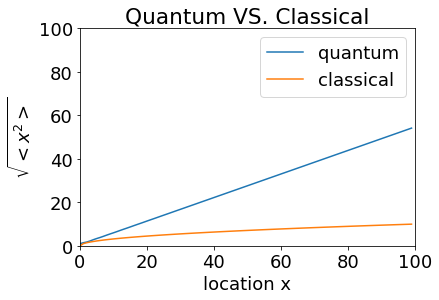

In [13]:
## Plot

steps = np.arange(0,100)
fig, ax = plt.subplots() 
ax.plot(steps, vari_q, label = 'quantum')
ax.plot(steps, vari_c, label = 'classical')
ax.set_xlabel('location x')  # Add an x-label to the axes.
ax.set_ylabel('$\sqrt{<x^2>}$')  # Add a y-label to the axes.
ax.set(xlim=(0, 100), ylim=(0, 100))

plt.title("Quantum VS. Classical")

matplotlib.rcParams.update({'font.size': 18})
ax.legend()
plt.show()

Thus, we can see that, different from classical random walk **For the quantum random walk, the variance after $n$ steps is proportional to the $n$, namely $\sqrt{E(x^2)}_n \propto n$,** which shows the quantum advantages.